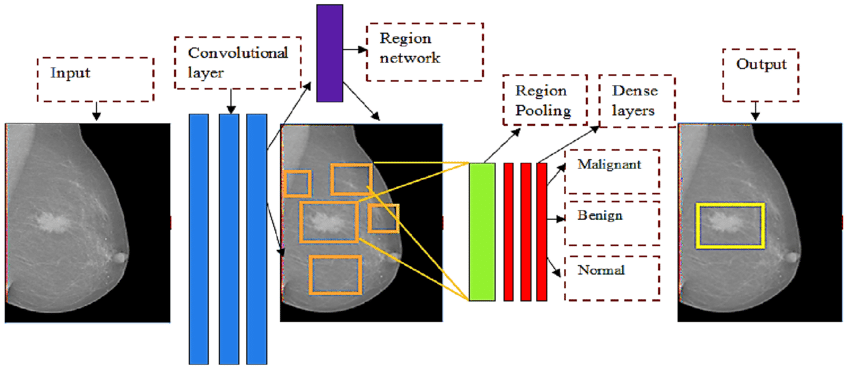

# Breast Cancer Classification System with Neural Network

#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data from sklearn

breast_cancer = sklearn.datasets.load_breast_cancer()
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
# loading the data to a dataframe

df = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
# adding the target column to the data frame

df['label'] = breast_cancer.target

In [5]:
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
df.shape

(569, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [9]:
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 ➡ Benign

0 ➡ Malignant

In [10]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Separating the feature and target


In [11]:
X = df.drop(columns= 'label' , axis=1)
y = df['label']

In [12]:
print(X)
print("============")
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

### Splitting the data into training data& testing data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


### Standardize the data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [18]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


## 🌎 Building the Neural Network

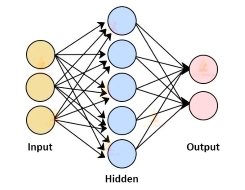

In [19]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [20]:
#setting up the layers of Neural Network 

model = keras.Sequential([
    
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')

])

In [21]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Training the Neural Network

history = model.fit(X_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10


13/13 [==============================] - 1s 26ms/step - loss: 5.4857 - accuracy: 0.6112 - val_loss: 1.6288 - val_accuracy: 0.7609
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 1.6196 - accuracy: 0.8215 - val_loss: 0.8964 - val_accuracy: 0.7826
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.9081 - accuracy: 0.8411 - val_loss: 0.2194 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.9022 - val_loss: 0.3451 - val_accuracy: 0.8261
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6037 - accuracy: 0.8826 - val_loss: 0.1946 - val_accuracy: 0.9348
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.5420 - accuracy: 0.9071 - val_loss: 0.2547 - val_accuracy: 0.8261
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5427 - accuracy: 0.8949 - val_loss: 0.1699 - val_accuracy: 0.9565
Epoch 8/10
13/13 

In [23]:
# Training the Neural Network

history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 20ms/step - loss: 0.6268 - accuracy: 0.6626 - val_loss: 0.3847 - val_accuracy: 0.8478
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.3620 - accuracy: 0.8435 - val_loss: 0.2362 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2586 - accuracy: 0.8900 - val_loss: 0.1887 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2096 - accuracy: 0.9071 - val_loss: 0.1609 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1789 - accuracy: 0.9315 - val_loss: 0.1423 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1570 - accuracy: 0.9413 - val_loss: 0.1297 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 0.9462 - val_loss: 0.1198 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

## Visualizing accuracy and loss

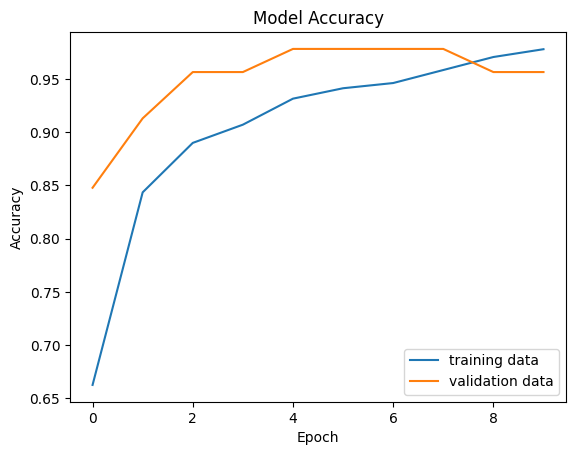

In [24]:
plt.plot(history.history['accuracy']) #blue line
plt.plot(history.history['val_accuracy']) #orange line
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.legend(['training data', 'validation data'], loc= 'lower right')

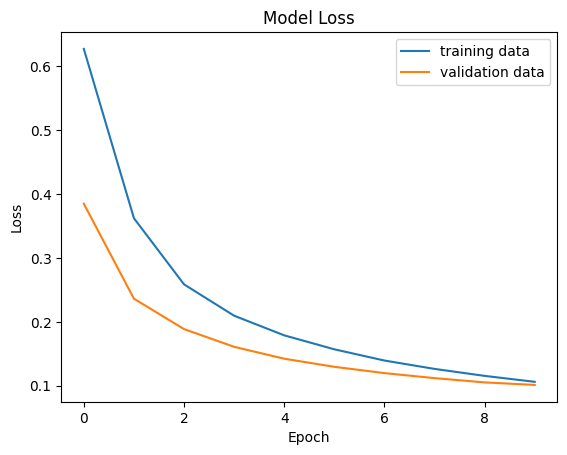

In [25]:
plt.plot(history.history['loss']) #blue line
plt.plot(history.history['val_loss']) #orange line
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.legend(['training data', 'validation data'], loc= 'upper right')

## Accuracy of the model on test data

In [26]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9561
0.9561403393745422


In [27]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941 -0.18759821
  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725  2.38110688
  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043  2.21465008
 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004 -0.44557481
  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353 -0.65597459]


In [28]:
y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 1ms/step


In [29]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.22606704 0.6147112 ]


0.65 ➡ 0 

0.92 ➡ 1

In [30]:
print(y_pred)

[[2.26067036e-01 6.14711225e-01]
 [3.33845973e-01 5.79247236e-01]
 [5.26355617e-02 9.38996375e-01]
 [8.68355215e-01 5.91032403e-07]
 [3.06460917e-01 5.57825506e-01]
 [4.98606235e-01 5.64925605e-04]
 [2.53875792e-01 7.85578966e-01]
 [3.31797563e-02 9.44098294e-01]
 [8.53614807e-02 8.66934299e-01]
 [7.49954805e-02 8.83946359e-01]
 [3.79060566e-01 4.64503348e-01]
 [1.57401666e-01 8.37776721e-01]
 [2.00362638e-01 8.48625183e-01]
 [1.85785800e-01 8.41145635e-01]
 [1.14373557e-01 8.99557173e-01]
 [5.40448070e-01 7.72790238e-02]
 [7.51521066e-02 9.00328279e-01]
 [4.48731072e-02 8.95110071e-01]
 [5.27757406e-02 8.27700317e-01]
 [4.09933746e-01 1.54556648e-03]
 [1.44680329e-02 3.02227557e-01]
 [5.35462201e-02 8.97886515e-01]
 [8.30281600e-02 8.64640832e-01]
 [3.62268165e-02 9.63334382e-01]
 [1.80952102e-01 8.37822318e-01]
 [4.78413880e-01 4.79695108e-03]
 [1.12191275e-01 8.66580904e-01]
 [1.57723188e-01 7.79719949e-01]
 [2.88043022e-01 3.96542102e-02]
 [3.97653759e-01 1.29695004e-02]
 [1.035218

In [31]:
# converting the prediction Probability to class label

y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


## 🤖Building the predictive system

In [32]:
input_data = (11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,0.0611,0.2273,0.6329,1.52,17.47,0.00721,0.00838,0.01311,0.008,0.01996,0.002635,13.1,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408
)

#change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy arrayas we predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

1/1 [==============================] - 0s 27ms/step
[[0.0404919 0.9179272]]
[1]
The tumor is Benign
